# Self Attention Mechanism


# Step 1)
Input Embedding Matrix is converted into 3 different matrix
1) Input*Wq = Queries Matrix
2) Input*Wk = Keys Matrix
3) Input*Wv = Values Matrix
* Wk, Wq, Wv are called Trainable Weight Matrix

In [3]:
import torch

In [4]:
# Input Embedding Matrix
inputs = torch.tensor (
    [[0.43, 0.15, 0.89],  #(x^1) Your
     [0.55, 0.87, 0.66],  #(x^2) journey
     [0.57, 0.85, 0.64],  #(x^3) starts
     [0.22, 0.58, 0.33],  #(x^4) with
     [0.77, 0.25, 0.10],  #(x^5) one
     [0.05, 0.80, 0.55]]  #(x^6) step
)

In [5]:
x2 = inputs[1]
dimIn = inputs.shape[1] # Columns(3)
dimOut = 2

In [6]:
# Initializing Query, Key and Value
torch.manual_seed(123)
wQuery = torch.nn.Parameter(torch.rand(dimIn, dimOut), requires_grad= False)
wKey = torch.nn.Parameter(torch.rand(dimIn, dimOut), requires_grad= False)
wValue = torch.nn.Parameter(torch.rand(dimIn, dimOut), requires_grad= False)

In [7]:
print(wQuery)
print(wKey)
print(wValue)

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])
Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]])
Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]])


In [8]:
# For Token embedding X2(Journey)
queryForx2 = x2 @ wQuery
keyForx2 = x2 @ wKey
valueForx2 = x2 @ wValue
print(queryForx2)
print(keyForx2)
print(valueForx2)

tensor([0.4306, 1.4551])
tensor([0.4433, 1.1419])
tensor([0.3951, 1.0037])


In [9]:
queryMatrix = inputs @ wQuery #(6 X 3)*(3 X 2)
keyMatrix = inputs @ wKey #(6 X 3)*(3 X 2)
valueMatrix = inputs @ wValue #(6 X 3)*(3 X 2)

print(queryMatrix)
print(keyMatrix)
print(valueMatrix)

tensor([[0.2309, 1.0966],
        [0.4306, 1.4551],
        [0.4300, 1.4343],
        [0.2355, 0.7990],
        [0.2983, 0.6565],
        [0.2568, 1.0533]])
tensor([[0.3669, 0.7646],
        [0.4433, 1.1419],
        [0.4361, 1.1156],
        [0.2408, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]])
tensor([[0.1855, 0.8812],
        [0.3951, 1.0037],
        [0.3879, 0.9831],
        [0.2393, 0.5493],
        [0.1492, 0.3346],
        [0.3221, 0.7863]])


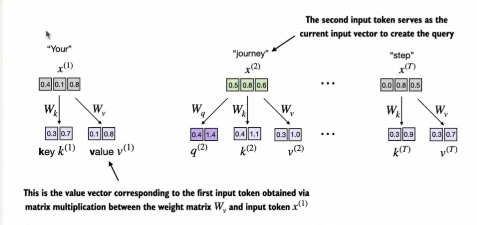

# Step 2) Computing Attention Scores
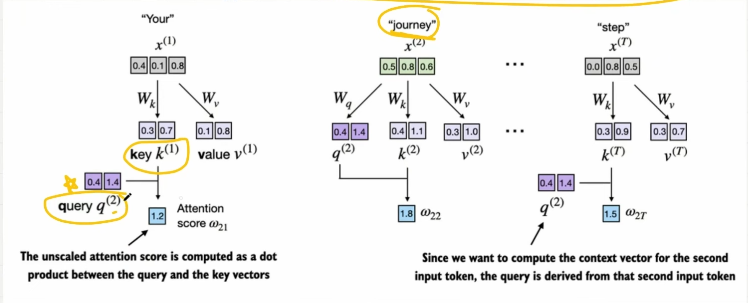

* For Just A Case for token embedding x2(Journey) the attention scores(w) for each token is calculated using dot product of key vector of each token embeddings and choosen token's query vector q2

* w21 = k1*q2
* w22 = k2*q2
* w23 = k3*q2
* w2T = q2*kT

In [10]:
attentionScoreForX2 = queryForx2 @ keyMatrix.T
print("        w21     w22     w23     w24     w25    w26")
print(attentionScoreForX2 )

        w21     w22     w23     w24     w25    w26
tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [11]:
# Attention Scores Matrix
attentionScoresMatrix = queryMatrix @ keyMatrix.T
print(attentionScoresMatrix)

tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])


Like in above attentionScores Matrix
matrix[1][1] is attention score w11 that is q1k1.
matrix[1][2] is w12 that is q1k2 and so on

# Step 3) Converting Attention Scores Into Attention Weights Using SOFTMAX Normalization


* Before Normalization We Scale The Attention Scores Matrix by sqrt(dim_keys) i.e 2 in this Case, Scale Attention Score Matrix By sqrt(2) this is why Self attention Mechanism is called Scaled Dot Product Attnetion

* AttentionScoreMatrix --> Scales by sqrt(2) --> Normalized Using Softmax

In [12]:
# For Particular Token X2
dimKeyMatrix = keyMatrix.shape[-1]
attentionWeightsForX2 = torch.softmax(attentionScoreForX2 / torch.sqrt(torch.tensor(dimKeyMatrix)), dim=-1)
print(attentionWeightsForX2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


In [13]:
attentionWeightMatrix = torch.softmax(attentionScoresMatrix / torch.sqrt(torch.tensor(dimKeyMatrix)), dim=-1)
print(attentionWeightMatrix)
print(attentionWeightMatrix.sum())

tensor([[0.1551, 0.2104, 0.2059, 0.1413, 0.1074, 0.1799],
        [0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820],
        [0.1503, 0.2256, 0.2192, 0.1315, 0.0914, 0.1819],
        [0.1591, 0.1994, 0.1962, 0.1477, 0.1206, 0.1769],
        [0.1610, 0.1949, 0.1923, 0.1501, 0.1265, 0.1752],
        [0.1557, 0.2092, 0.2048, 0.1419, 0.1089, 0.1794]])
tensor(6.0000)


# Why sqrt(dimKeyMat)
Reason 1 --> For Stability in Learning

Softmax is sensitive to magnitude of inputs, when the inputs are large the difference between exponential values becomes much more pronounced, this causes softmax output to become PEAKY, where the highest value receives almost all Probability mass

Reason 2 --> To make Variance of dot product stable

Dot Product of Query and Key Increases the Variance as multplying 2 random no increases variance

So scaling or dividing by sqrt(dimension) keeps the variance close to 1

# Step 4) Computing Context Vectors
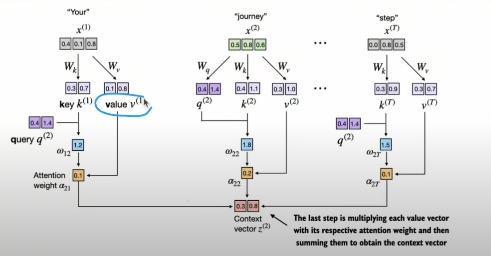

For Particular x2(Journey) its context vector will be calculated using

alpha21 = w21 i.e q2.k1
alpha22 = w22 i.e q2.k2
alpha23 = w23 i.e q2.k3

z2 = alpha21 + alpha22 + alpha23 + alpha2T

z2 is Context vector for x2

In [15]:
contextVectorForX2 = attentionWeightsForX2 @ valueMatrix
print(contextVectorForX2)

tensor([0.3061, 0.8210])


In [14]:
contextVectorMatrix = attentionWeightMatrix @ valueMatrix
print(contextVectorMatrix)

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]])


# Implementing Basic Self Attention Class

In [17]:
import torch.nn as nn
class selfAttentionV1(nn.Module):
  # Trainable Weight Matrix
  def __init__(self, dimIn, dimOut):
    super().__init__()
    self.wQuery = nn.Parameter(torch.randn(dimIn, dimOut))
    self.wKey = nn.Parameter(torch.randn(dimIn, dimOut))
    self.wValue = nn.Parameter(torch.randn(dimIn, dimOut))

  # Computing Key, Value, Query Matrix (x --> ip) then attention scores, weights and context vectors
  def forward(self, x):
    keysMatrix = x @ self.wKey
    queriesMatrix = x @ self.wQuery
    valuesMatrix = x @ self.wValue

    attentionScores = queriesMatrix @ keysMatrix.T
    attentionWeights = torch.softmax(attentionScores/keysMatrix.shape[-1]**0.5, dim=-1)
    contextVectors = attentionWeights @ valuesMatrix

    return attentionWeights, contextVectors


In [23]:
torch.manual_seed(123)
saV1 = selfAttentionV1(dimIn = 3, dimOut = 2)
print(saV1(inputs))

(tensor([[0.1687, 0.1576, 0.1615, 0.1467, 0.2490, 0.1165],
        [0.1704, 0.1611, 0.1652, 0.1412, 0.2505, 0.1117],
        [0.1704, 0.1613, 0.1653, 0.1419, 0.2481, 0.1129],
        [0.1704, 0.1656, 0.1679, 0.1524, 0.2095, 0.1342],
        [0.1680, 0.1651, 0.1661, 0.1622, 0.1856, 0.1529],
        [0.1711, 0.1640, 0.1675, 0.1444, 0.2340, 0.1191]],
       grad_fn=<SoftmaxBackward0>), tensor([[0.2845, 0.4071],
        [0.2854, 0.4081],
        [0.2854, 0.4075],
        [0.2864, 0.3974],
        [0.2863, 0.3910],
        [0.2860, 0.4039]], grad_fn=<MmBackward0>))


# Implementing Advanced Self Attention Class

In [32]:
import torch.nn as nn

# nn. Linear has more smooth initialization scheme contributing to more stable and effective model training
class selfAttentionV2(nn.Module):
  # Trainable Weight Matrix
  def __init__(self, dimIn, dimOut, qkv_bias = False):
    super().__init__()
    self.wQuery = nn.Linear(dimIn, dimOut, bias = qkv_bias)
    self.wKey = nn.Linear(dimIn, dimOut, bias = qkv_bias)
    self.wValue = nn.Linear(dimIn, dimOut, bias = qkv_bias)

  # Computing Key, Value, Query Matrix (x --> ip) then attention scores, weights and context vectors
  def forward(self, x):
    keysMatrix = self.wKey(x)
    queriesMatrix = self.wQuery(x)
    valuesMatrix = self.wValue(x)

    attentionScores = queriesMatrix @ keysMatrix.T
    attentionWeights = torch.softmax(attentionScores/keysMatrix.shape[-1]**0.5, dim=-1)
    contextVectors = attentionWeights @ valuesMatrix

    return attentionWeights, contextVectors

In [33]:
torch.manual_seed(789)
saV2 = selfAttentionV2(dimIn = 3, dimOut = 2)
print(saV2(inputs))

(tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>), tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>))


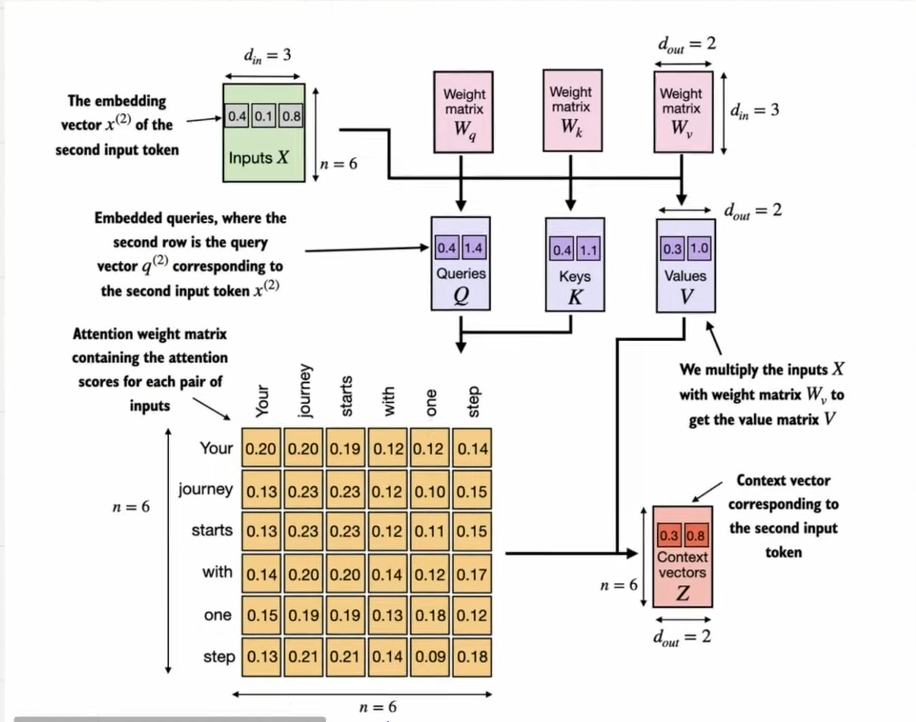